## **Introduction to Tree-Based Ensembles**

* undersampling
* grid search cv

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/refs/heads/main/data/Telco_Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## drop CustomerID
df.drop(columns=['customerID'], inplace=True)

In [3]:
## fix TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
## impute TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

In [6]:
## map Churn to yes: 1, no: 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [7]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
## dummy encode
df = pd.get_dummies(df, drop_first=True)

In [9]:
## Create the X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [10]:
## split 80% train 20% test random_state = 13
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [11]:
## imbalance
y_train.value_counts()

,count
Churn,
0,4126
1,1508


In [12]:
## undersampling {1	1508, 0 1508}
from imblearn.under_sampling import RandomUnderSampler

## instance
rus = RandomUnderSampler(random_state=13)

## fit
X_train, y_train = rus.fit_resample(X_train, y_train)

In [13]:
## value counts
y_train.value_counts()

,count
Churn,
0,1508
1,1508


## **Modeling**

* Tree-based models (Decision Trees, Bagging, RandomForests, Boosting)
* Logistic Regression (linear models)
* Neural Networks

#### **Decision Trees**

Hyperparameters

* Gini, entropy
* Stopping criteria (max_depth, max_leaf_nodes, min_impurity_decrease)

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
## Grid Search

## 1) grid
param_grid ={
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2, 6, 8, None],
    'max_leaf_nodes' : [6, 8, 12, 20, None]
}

## 2) Gridseach
from sklearn.model_selection import GridSearchCV

## 3) instance of the model to optimize
dt = DecisionTreeClassifier() ## unrestricted

## 4) instance of grid search
dt_grid = GridSearchCV(dt, param_grid = param_grid , cv = 5, n_jobs = -1)

## 5) fit the grid
dt_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 6, 8, None],
                         'max_leaf_nodes': [6, 8, 12, 20, None]})

In [17]:
## total models checked
2*4*5*5  ## 40 models looped 5 times each

200

In [20]:
## best estimator (obtained the best AVG accuracy on the folds)
dt_grid.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=12)

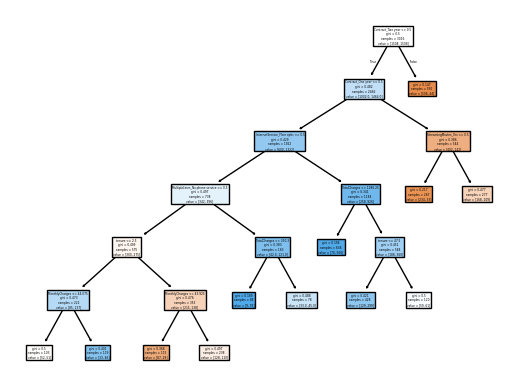

In [22]:
from sklearn.tree import plot_tree

plot_tree(dt_grid.best_estimator_, feature_names=X_train.columns, filled=True);

In [23]:
## average accuracy on the best model
dt_grid.best_score_

0.7586235489220563

In [24]:
dt_grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 12}

#### **Bagging**

Takes Bootstrap samples (random samples with replacement) to create different data sets . If you create an ensemble of 10 trees (generates 10 bootstrap samples) and the trees are fit in these bootstrap samples. This should decrease the variance.

In [25]:
from sklearn.ensemble import BaggingClassifier

## ideally, you also want to perform GridSearch
## instance
bag = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth = 1), n_estimators = 3, random_state = 13)

## fit
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=3,
                  random_state=13)

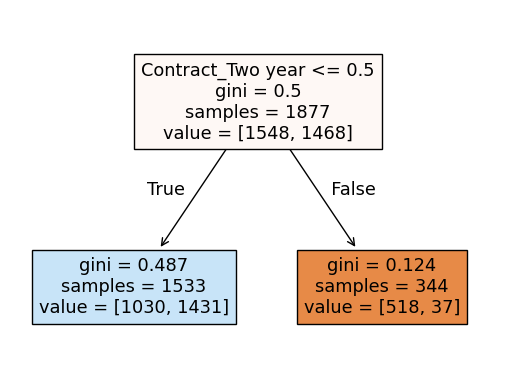

In [30]:
## tree # 1
plot_tree(bag.estimators_[0], feature_names=X_train.columns, filled=True);

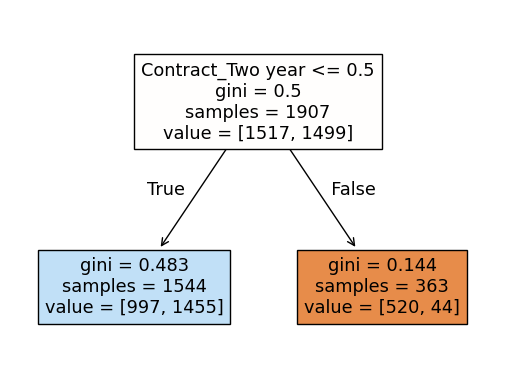

In [31]:
## tree # 2
plot_tree(bag.estimators_[1], feature_names=X_train.columns, filled=True);

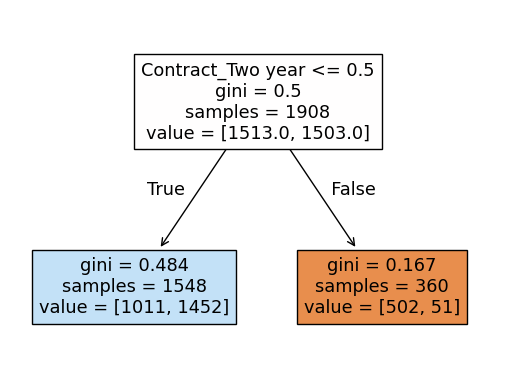

In [32]:
## tree # 3
plot_tree(bag.estimators_[2], feature_names=X_train.columns, filled=True);

In [33]:
## what is the prediction for the first observation in the test?
bag.predict(X_test)[0]  ## ensemble prediction

0

In [36]:
## VOTING
print(bag.estimators_[0].predict(X_test)[0])
print(bag.estimators_[1].predict(X_test)[0])
print(bag.estimators_[2].predict(X_test)[0])

0
0
0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [37]:
## what is the prediction for the first observation in the test?
bag.predict_proba(X_test)[:,1][0]  ## ensemble prediction

0.07896836084285586

In [38]:
## AVERAGING
print(bag.estimators_[0].predict_proba(X_test)[:,1][0])
print(bag.estimators_[1].predict_proba(X_test)[:,1][0])
print(bag.estimators_[2].predict_proba(X_test)[:,1][0])

0.06666666666666667
0.07801418439716312
0.0922242314647378


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
